In [20]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

#### For removing the imbalance in dataset, i will be using data augmentation for particular categories (will less no. of images) for TRAINING generalisation.
There are three categories, namely, Assault, Shooting, & Vandalism for which we have less data, so we'll be augmenting those sections.

In [14]:
from torchvision import transforms
from PIL import Image
import os

def augment_and_save_images(input_folder, output_folder, num_augmentations=1):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    data_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(5)
    ])

    for img_name in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_name)
        
        image = Image.open(img_path).convert("RGB")
        for i in range(num_augmentations):
            aug_image = data_transforms(image)
            aug_img_name = f"{os.path.splitext(img_name)[0]}_aug_{i+1}{os.path.splitext(img_name)[1]}"
            aug_img_path = os.path.join(output_folder, aug_img_name)
            aug_image.save(aug_img_path)

In [15]:
input_folder1='/kaggle/input/ucf-crime-dataset/Train/Assault'
output_folder1='/kaggle/working/Assault_aug'
augment_and_save_images(input_folder1, output_folder1, num_augmentations=1)
input_folder1='/kaggle/input/ucf-crime-dataset/Train/Shooting'
output_folder1='/kaggle/working/Shooting_aug'
augment_and_save_images(input_folder1, output_folder1, num_augmentations=1)
input_folder1='/kaggle/input/ucf-crime-dataset/Train/Vandalism'
output_folder1='/kaggle/working/Vandalism_aug'
augment_and_save_images(input_folder1, output_folder1, num_augmentations=1)

In [19]:
import zipfile
def zip_dir(directory_path, zip_name):
    with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, directory_path)
                zipf.write(file_path, arcname)
zip_dir("/kaggle/working/Shooting_aug", "/kaggle/working/Shooting_aug.zip")
zip_dir("/kaggle/working/Assault_aug", "/kaggle/working/Assault_aug.zip")
zip_dir("/kaggle/working/Vandalism_aug", "/kaggle/working/Vandalism_aug.zip")

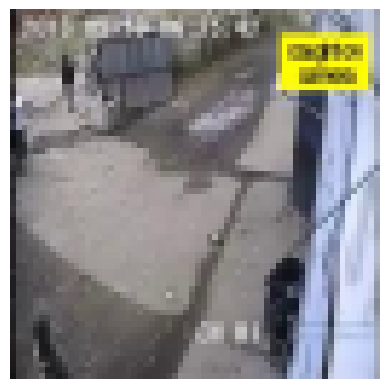

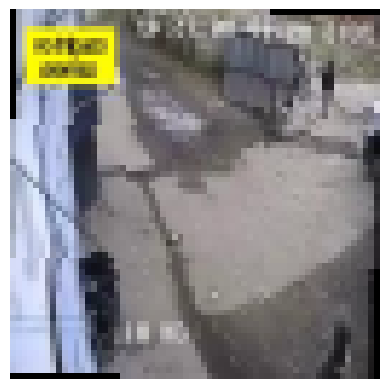

In [26]:
sample_dir = "/kaggle/input/ucf-crime-dataset/Train/Assault/Assault008_x264_100.png"
with Image.open(sample_dir) as im:
    plt.imshow(im)
    plt.axis('off')
    plt.show()
sample_dir_aug = "/kaggle/working/Assault_aug/Assault008_x264_100_aug_1.png"
with Image.open(sample_dir_aug) as im:
    plt.imshow(im)
    plt.axis('off')
    plt.show()

Now, I will combine them with ther respective categories, while training the model.